In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

#getting data with panda
loaded_dataset = pd.read_csv("dataset.csv")

#copying for keeping the original dataset unchanged
dataset = loaded_dataset.copy()

#visualizing first 5 elements and last 5 elements
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
#getting number of rows and columns data type
print(f"number of rows and columns in the dataset: {dataset.shape}\n")

#getting information about datatypes of columns
dataset.info()

print(f"\nnumber of null values per each column:\n{dataset.isna().sum()}")
#since number of rows equal to non-null count for each feature,
# there is no Null information in this dataset

number of rows and columns in the dataset: (1338, 7)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB

number of null values per each column:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


In [4]:
'''getting some distribution information about columns in the
dataset that are consist of numerical values'''
dataset.describe().T


,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


VISUALIZING BMI column




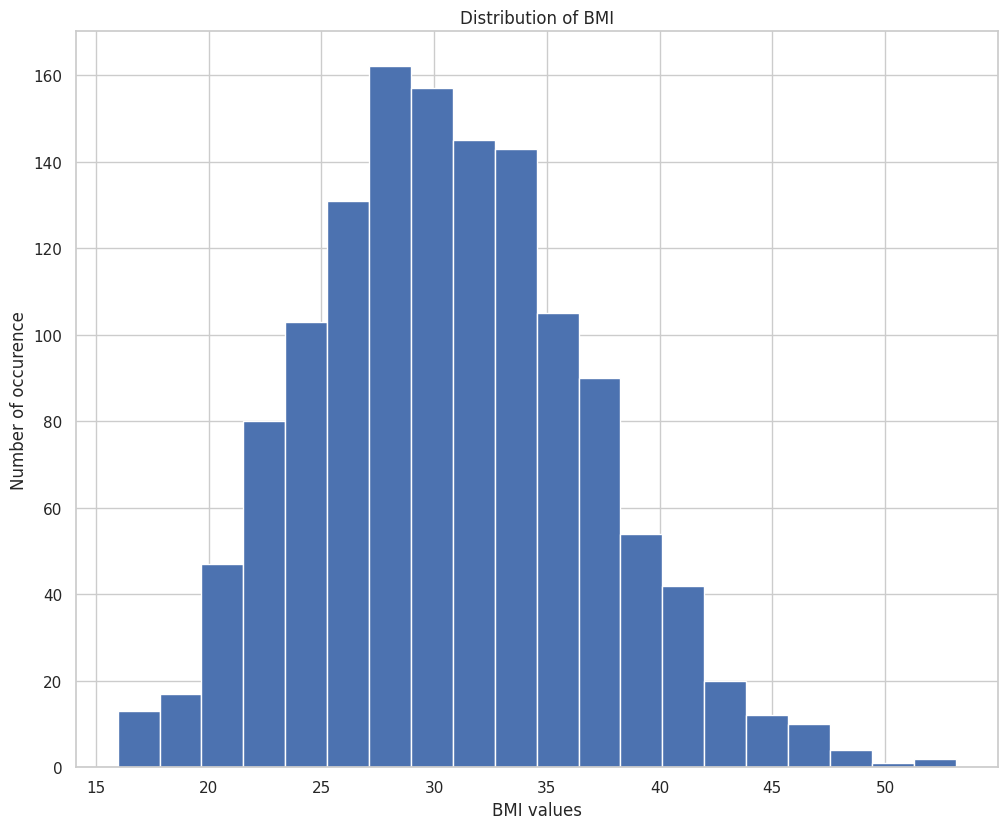

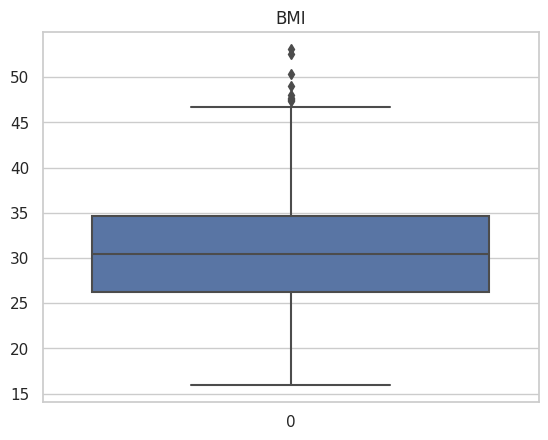

In [26]:
import matplotlib.pyplot as plt

print("VISUALIZING BMI column\n\n")
column = 'bmi'
plt.figure()
dataset[column].hist(bins=20, figsize=(10, 8))  # You can adjust the 'bins' and 'figsize' parameters
plt.tight_layout()
plt.ylabel("Number of occurence")
plt.xlabel("BMI values")
plt.title("Distribution of BMI")
plt.show()

print("\n\n\n\n")
plt.figure()
sns.boxplot(dataset[column])
plt.title("BMI")
plt.show()

#Since we have data points outside of the boxplot lines, there are outliers in the BMI variable.



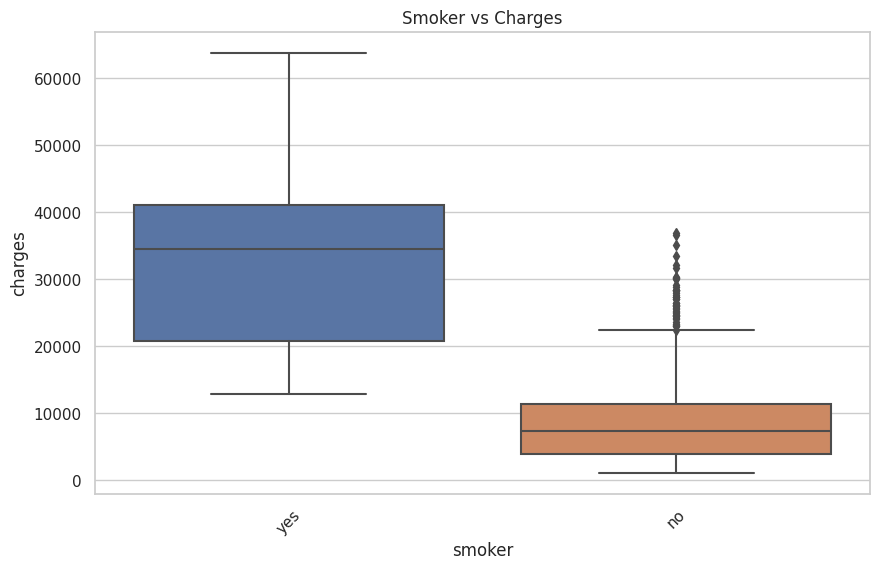

In [33]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="smoker", y="charges", data=dataset)
plt.xlabel("smoker")
plt.ylabel("charges")
plt.title(f'Smoker vs Charges')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


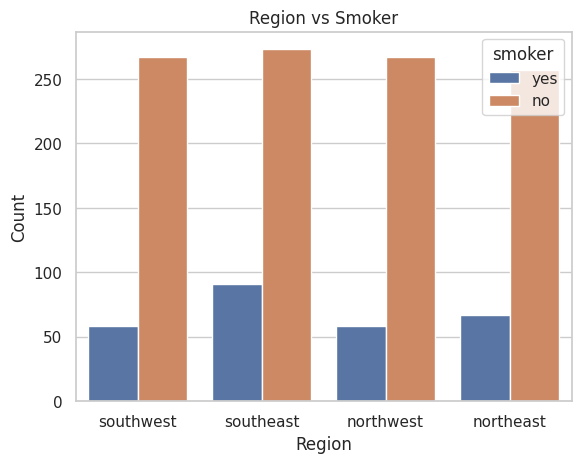

In [32]:
plt.figure()
sns.countplot(data=dataset, x = 'region', hue='smoker')
plt.xlabel("Region")
plt.ylabel("Count")
plt.title("Region vs Smoker")
plt.show()



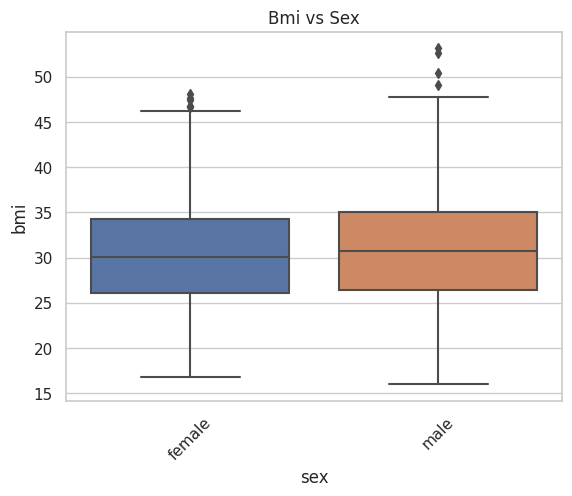

In [31]:
plt.figure()
sns.boxplot(x='sex', y='bmi', data=dataset)
plt.xlabel('sex')
plt.ylabel('bmi')
plt.title('Bmi vs Sex')
plt.xticks(rotation=45)
plt.show()

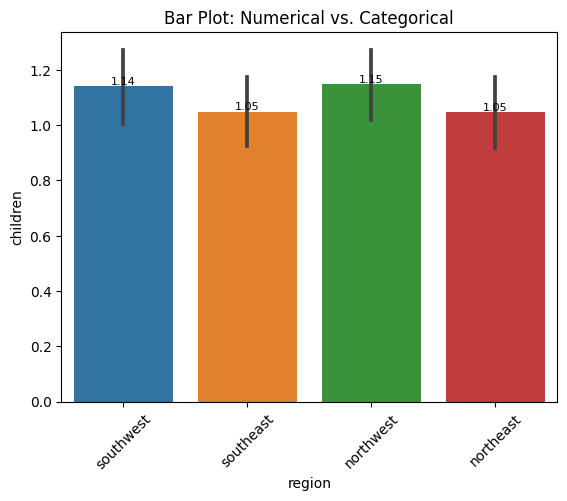

In [9]:
plt.figure()
graph = sns.barplot(x='region', y='children', data=dataset)
for bar in graph.patches:
    height = bar.get_height()
    graph.annotate(f'{height:.2f}', (bar.get_x() + bar.get_width() / 2, height),
                ha='center', va='bottom', fontsize=8, color='black')

plt.xlabel('region')
plt.ylabel('children')
plt.title('Bar Plot: Region vs. Children')
plt.xticks(rotation=45)
plt.show()
#green block has bigger value as 1.15, therefore northwest region has most children

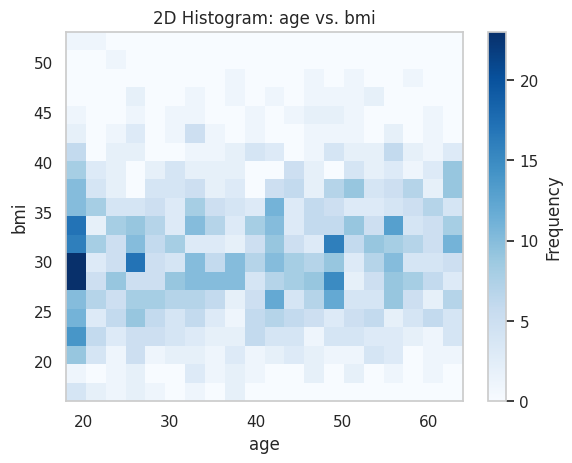

<Figure size 640x480 with 0 Axes>

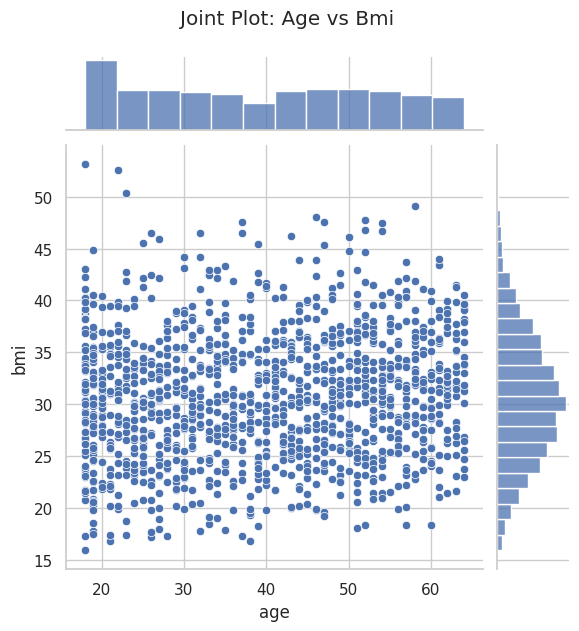

In [39]:
plt.figure()
plt.hist2d(dataset['age'], dataset['bmi'], bins=20, cmap='Blues')
plt.xlabel('age')
plt.ylabel('bmi')
plt.title('2D Histogram: age vs. bmi')
plt.colorbar(label='Frequency')
plt.show()
print("\n\n\n")
plt.figure()
joint_plot = sns.jointplot(x='age', y='bmi', data=dataset, kind='scatter')
plt.xlabel('age')
plt.ylabel('bmi')
joint_plot.fig.suptitle("Joint Plot: Age vs Bmi", y=1.05)
plt.show()

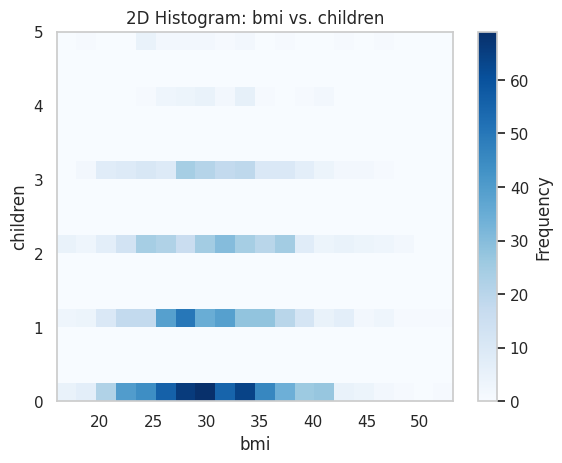

<Figure size 640x480 with 0 Axes>

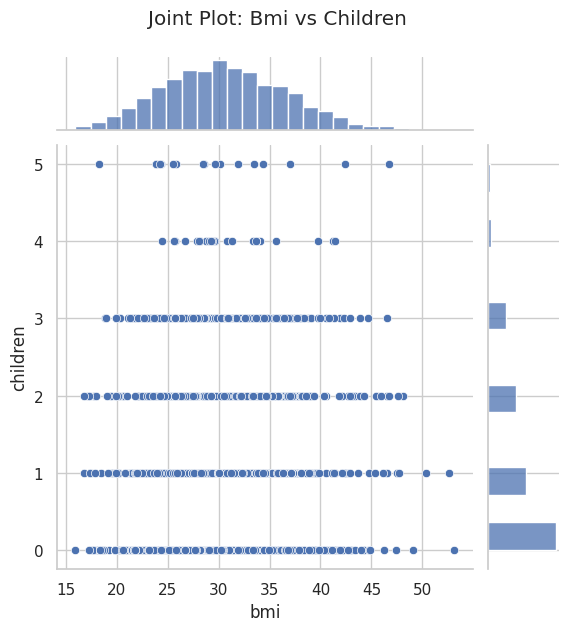

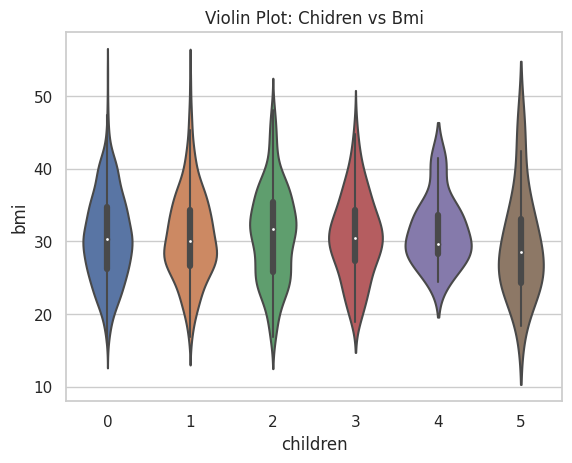

In [42]:
plt.figure()
plt.hist2d(dataset['bmi'], dataset['children'], bins=20, cmap='Blues')
plt.xlabel('bmi')
plt.ylabel('children')
plt.title('2D Histogram: bmi vs. children')
plt.colorbar(label='Frequency')
plt.show()
print("\n\n\n")
plt.figure()
joint_plot = sns.jointplot(x='bmi', y='children', data=dataset, kind='scatter')
plt.xlabel('bmi')
plt.ylabel('children')
joint_plot.fig.suptitle("Joint Plot: Bmi vs Children", y=1.05)
plt.show()
print("\n\n\n")
plt.figure()
sns.violinplot(x='children', y='bmi', data=dataset)
plt.xlabel('children')
plt.ylabel('bmi')
plt.title('Violin Plot: Chidren vs Bmi')
plt.show()

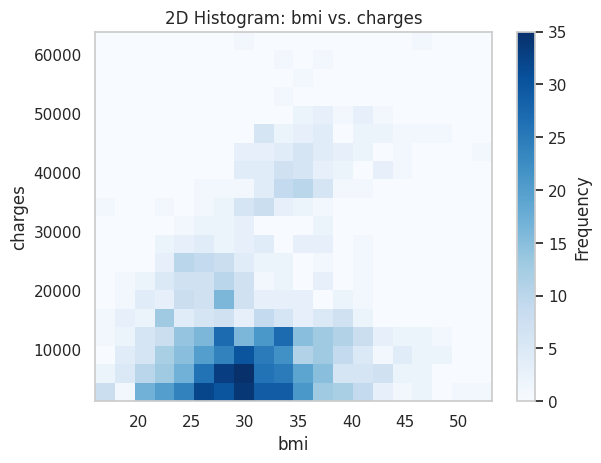

<Figure size 640x480 with 0 Axes>

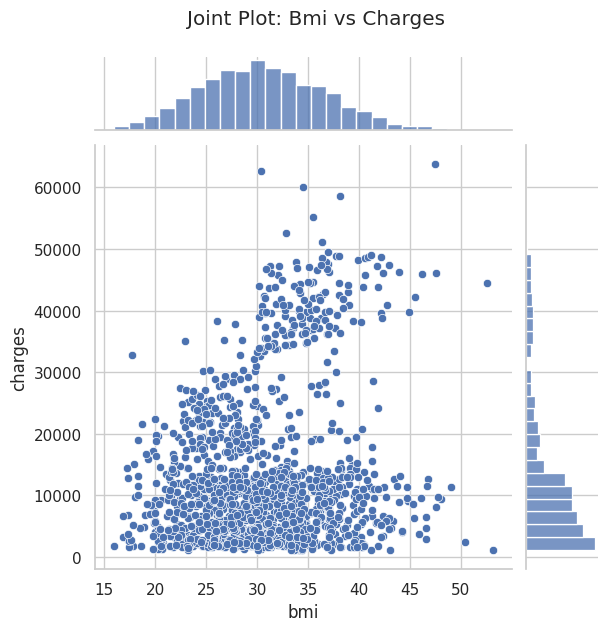

In [43]:
plt.figure()
plt.hist2d(dataset['bmi'], dataset['charges'], bins=20, cmap='Blues')
plt.xlabel('bmi')
plt.ylabel('charges')
plt.title('2D Histogram: bmi vs. charges')
plt.colorbar(label='Frequency')
plt.show()
print("\n\n\n")
plt.figure()
joint_plot = sns.jointplot(x='bmi', y='charges', data=dataset, kind='scatter')
plt.xlabel('bmi')
plt.ylabel('charges')
joint_plot.fig.suptitle("Joint Plot: Bmi vs Charges", y=1.05)
plt.show()

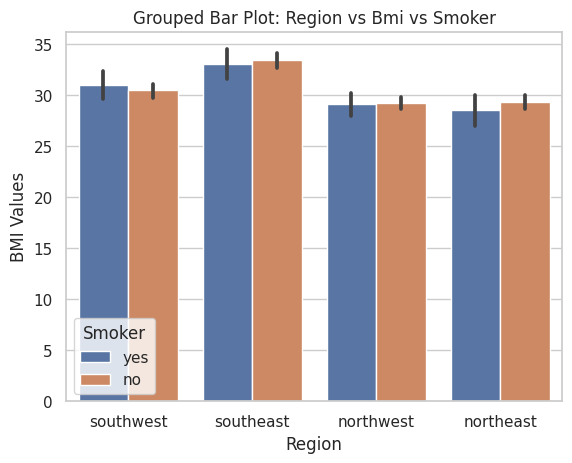

In [44]:
plt.figure()
sns.set(style="whitegrid")  # Set plot style

# Create a grouped bar plot
ax = sns.barplot(x='region', y='bmi', hue='smoker', data=dataset)

plt.xlabel('Region')
plt.ylabel('BMI Values')
plt.title('Grouped Bar Plot: Region vs Bmi vs Smoker')

# Customize the legend
plt.legend(title='Smoker')

plt.show()

In [18]:
# We remove outliers via InterQuartile Range.
# If the data point is smaller than Q1- 1.5* IQR or larger than Q3 + 1.5IQR,
# we say that the point is outlier and we remove it.


Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3 - Q1
threshold = 1.5
outliers_mask = ((dataset < Q1 - threshold * IQR) | (dataset > Q3 + threshold * IQR))
cleaned_df = dataset[~outliers_mask.any(axis=1)]
cleaned_df

<ipython-input-18-442ab6576b9a>:19: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = dataset.quantile(0.25)
<ipython-input-18-442ab6576b9a>:20: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = dataset.quantile(0.75)
<ipython-input-18-442ab6576b9a>:23: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers_mask = ((dataset < Q1 - threshold * IQR) | (dataset > Q3 + threshold * IQR))


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [19]:
#lets see the information about numerical columns again after removing the outliers,
#it is better now since data points of age and bmi do not differ more than 3*std from mean value.
cleaned_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1193.0,38.981559,14.063482,18.0000,26.0000,39.00000,51.000,64.000
bmi,1193.0,29.998529,5.866873,15.9600,25.8000,29.73500,33.770,46.750
children,1193.0,1.085499,1.216249,0.0000,0.0000,1.00000,2.000,5.000
charges,1193.0,9942.269682,7251.326564,1121.8739,4415.1588,8410.04685,12979.358,34472.841


In [20]:
from sklearn.preprocessing import LabelEncoder
categorical_columns = ['sex', 'smoker', 'region']
encoder = LabelEncoder()

# Apply label encoding to each categorical column
for col in categorical_columns:
    cleaned_df.loc[:, col] = encoder.fit_transform(cleaned_df.loc[:, col])
cleaned_df

<ipython-input-20-5a37d596fb8a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.loc[:, col] = encoder.fit_transform(cleaned_df.loc[:, col])
<ipython-input-20-5a37d596fb8a>:7: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  cleaned_df.loc[:, col] = encoder.fit_transform(cleaned_df.loc[:, col])
<ipython-input-20-5a37d596fb8a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [21]:
from sklearn.preprocessing import MinMaxScaler


numerical_columns = ['age', 'bmi', 'children', 'charges']  # Names of numerical columns
scaler = MinMaxScaler() #our normalization function

# Apply normalization to each numerical column
cleaned_df[numerical_columns] = scaler.fit_transform(cleaned_df[numerical_columns])
cleaned_df

<ipython-input-21-9957c70daeb6>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df[numerical_columns] = scaler.fit_transform(cleaned_df[numerical_columns])


,age,sex,bmi,children,smoker,region,charges
0,0.021739,0,0.387788,0.0,1,3,0.472641
1,0.000000,1,0.578435,0.2,0,2,0.018101
2,0.217391,1,0.553426,0.6,0,2,0.099775
3,0.326087,1,0.219065,0.0,0,1,0.625547
4,0.304348,1,0.419617,0.0,0,1,0.082306
...,...,...,...,...,...,...,...
1333,0.695652,1,0.487496,0.6,0,1,0.284210
1334,0.000000,0,0.518350,0.0,0,0,0.032506
1335,0.000000,0,0.678467,0.0,0,2,0.015231
1336,0.065217,0,0.319584,0.0,0,3,0.026568


In [22]:
from sklearn.model_selection import train_test_split

y = cleaned_df['charges']
X = cleaned_df.drop(['charges'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) #splitting the data
print(X_train.shape)
print(y_train.shape)
X_test

(954, 6)
(954,)


,age,sex,bmi,children,smoker,region
28,0.108696,1,0.046281,0.2,0,1
172,0.000000,1,0.000000,0.0,0,0
150,0.369565,1,0.265346,0.2,0,1
474,0.782609,1,0.296850,0.6,1,3
1327,0.717391,1,0.456967,0.2,0,2
...,...,...,...,...,...,...
887,0.391304,0,0.456642,0.0,0,1
897,0.021739,1,0.311627,0.2,0,1
707,0.673913,1,0.413446,0.6,0,1
866,0.000000,1,0.692757,0.0,0,2


In [58]:

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor
import warnings

#trying mutliple models, we will try to optimize  Ridge, RandomForest and LGBM to see results

training_models = [("linear", LinearRegression()),
                   ("ridge", Ridge()),
                   ("lasso", Lasso()),
                   ("elastic net", ElasticNet()),
                   ("random forest", RandomForestRegressor()),
                   ("decision tree", DecisionTreeRegressor()),
                   ("xgb", XGBRegressor()),
                   ("svr", SVR()),
                   ("k-neighbors", KNeighborsRegressor()),
                   ("lgbm", LGBMRegressor(verbose=-1))]

for(name, model) in training_models:
    result = np.mean(np.sqrt(-cross_val_score(model, X_train, y_train, cv=5, scoring= "neg_mean_squared_error")))
    print(f'{name} , {format(result, ".4f")}')

linear , 0.1323
ridge , 0.1324
lasso , 0.2139
elastic net , 0.2139
random forest , 0.1356
decision tree , 0.1774
xgb , 0.1517
svr , 0.1409
k-neighbors , 0.1423
lgbm , 0.1368


In [47]:
#optimizing Ridge model
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

alpha_values = [0.001, 0.01, 0.1, 0.5,0.6,0.63,0.65,0.67, 0.7, 1]  # List of alpha values to test

ridge = Ridge()  # Ridge regression model

# creating dictionary of values and trying to fine best alpha value with grid search for our model

param_grid = {'alpha': alpha_values}
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_train, y_train)

best_alpha = grid_search.best_params_['alpha']

best_ridge = Ridge(alpha=best_alpha)
best_ridge.fit(X_train, y_train)
y_pred = best_ridge.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Best Alpha:", best_alpha)
print("Mean Squared Error:", mse)
print("R-squared:", r2)
res = np.mean(np.sqrt(-cross_val_score(best_ridge, X_train, y_train, cv=5, scoring= "neg_mean_squared_error")))
print(res)

Best Alpha: 0.67
Mean Squared Error: 0.02379417097530697
R-squared: 0.549341099749515
0.13235772684508612


In [25]:
#optimized values of Ridge model
y_res = best_ridge.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Mean Squared Error: 0.02378370373883018
Root Mean Squared Error: 0.1542196606753827
Mean Absolute Error: 0.08345980664226764
R-squared: 0.5495393480215052


In [70]:
#optimizing RandomForestRegressor
param_grid = {
    'n_estimators': [30,50,100, 200],
    'max_depth': [3,5,7,10]
}

rf_model = RandomForestRegressor()
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1,verbose=1)
grid_search.fit(X_train, y_train)
print("Best Hyperparameters:", grid_search.best_params_)
print("Best RMSE in grid search:", np.sqrt(-grid_search.best_score_))
print("\n\n")
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)
print("R-squared:", r2)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Hyperparameters: {'max_depth': 5, 'n_estimators': 50}
Best RMSE in grid search: 0.125982813369029



Mean Squared Error: 0.022010395303468825
Root Mean Squared Error: 0.14835900816421235
Mean Absolute Error: 0.07919167332232847
R-squared: 0.5831256087117475


In [75]:
#optimizing LGBMRegressor
param_grid = {
    'n_estimators': [50,70,100, 200, 300],
    'learning_rate': [0.01, 0.1,0.15, 0.2,0.3],
    'max_depth': [3, 5, 7]
}
lgbm_model = LGBMRegressor(random_state=42, verbose=-1)
grid_search = GridSearchCV(lgbm_model, param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print(best_params)
best_score = np.sqrt(-grid_search.best_score_)  # RMSE (negative of best MSE)
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Improved RMSE on training dataset", best_score)
print("RMSE Score on the test dataset:", test_rmse)
print("R2 Score on the test dataset", r2_score(y_test,y_pred))

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
Improved RMSE on training dataset 0.12799164754750597
RMSE Score on the test dataset: 0.15046583569958127
R2 Score on the test dataset 0.5712015786667552


Even though the results are fairly close, RandomForestRegressor gave us the best results as RMSE value 0.148 and R^2 value 0.583 on test dataset

